In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()

In [3]:
print(data["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
X = data["data"]
y = data["target"]

In [5]:
X.shape,y.shape

((20640, 8), (20640,))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42,
)

In [7]:
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [8]:
y_train.shape, y_test.shape

((16512,), (4128,))

DATA ANALYSIS

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(X_train,y_train, columns=data["feature_names"])
df["target"] = y_train


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,16512.0,3.880754,1.904294,0.499900,2.566700,3.545800,4.773175,15.000100
HouseAge,16512.0,28.608285,12.602499,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,16512.0,5.435235,2.387375,0.888889,4.452055,5.235874,6.061037,141.909091
AveBedrms,16512.0,1.096685,0.433215,0.333333,1.006508,1.049286,1.100348,25.636364
Population,16512.0,1426.453004,1137.056380,3.000000,789.000000,1167.000000,1726.000000,35682.000000
AveOccup,16512.0,3.096961,11.578744,0.692308,2.428799,2.817240,3.280000,1243.333333
Latitude,16512.0,35.643149,2.136665,32.550000,33.930000,34.260000,37.720000,41.950000
Longitude,16512.0,-119.582290,2.005654,-124.350000,-121.810000,-118.510000,-118.010000,-114.310000
target,16512.0,2.071947,1.156226,0.149990,1.198000,1.798500,2.651250,5.000010


In [12]:
df[df['AveOccup'] > 100].sort_values('AveOccup', ascending=False)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
1.375,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.375
0.675,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.675
3.500,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.500
2.250,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.250


In [13]:
df[df['AveRooms'] > 50].sort_values('AveOccup', ascending=False)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
5.00001,1.8750,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
2.21400,3.2431,14.0,52.848214,11.410714,265.0,2.366071,37.64,-119.02,2.21400
1.70000,1.1912,22.0,52.690476,8.857143,98.0,2.333333,39.15,-120.06,1.70000
4.37500,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06,4.37500
2.06300,4.9750,16.0,56.269231,10.153846,54.0,2.076923,39.01,-120.16,2.06300
0.87500,1.6154,17.0,62.422222,14.111111,83.0,1.844444,33.97,-114.49,0.87500
0.67500,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25,0.67500
1.25000,3.8750,23.0,50.837838,10.270270,64.0,1.729730,37.12,-119.34,1.25000


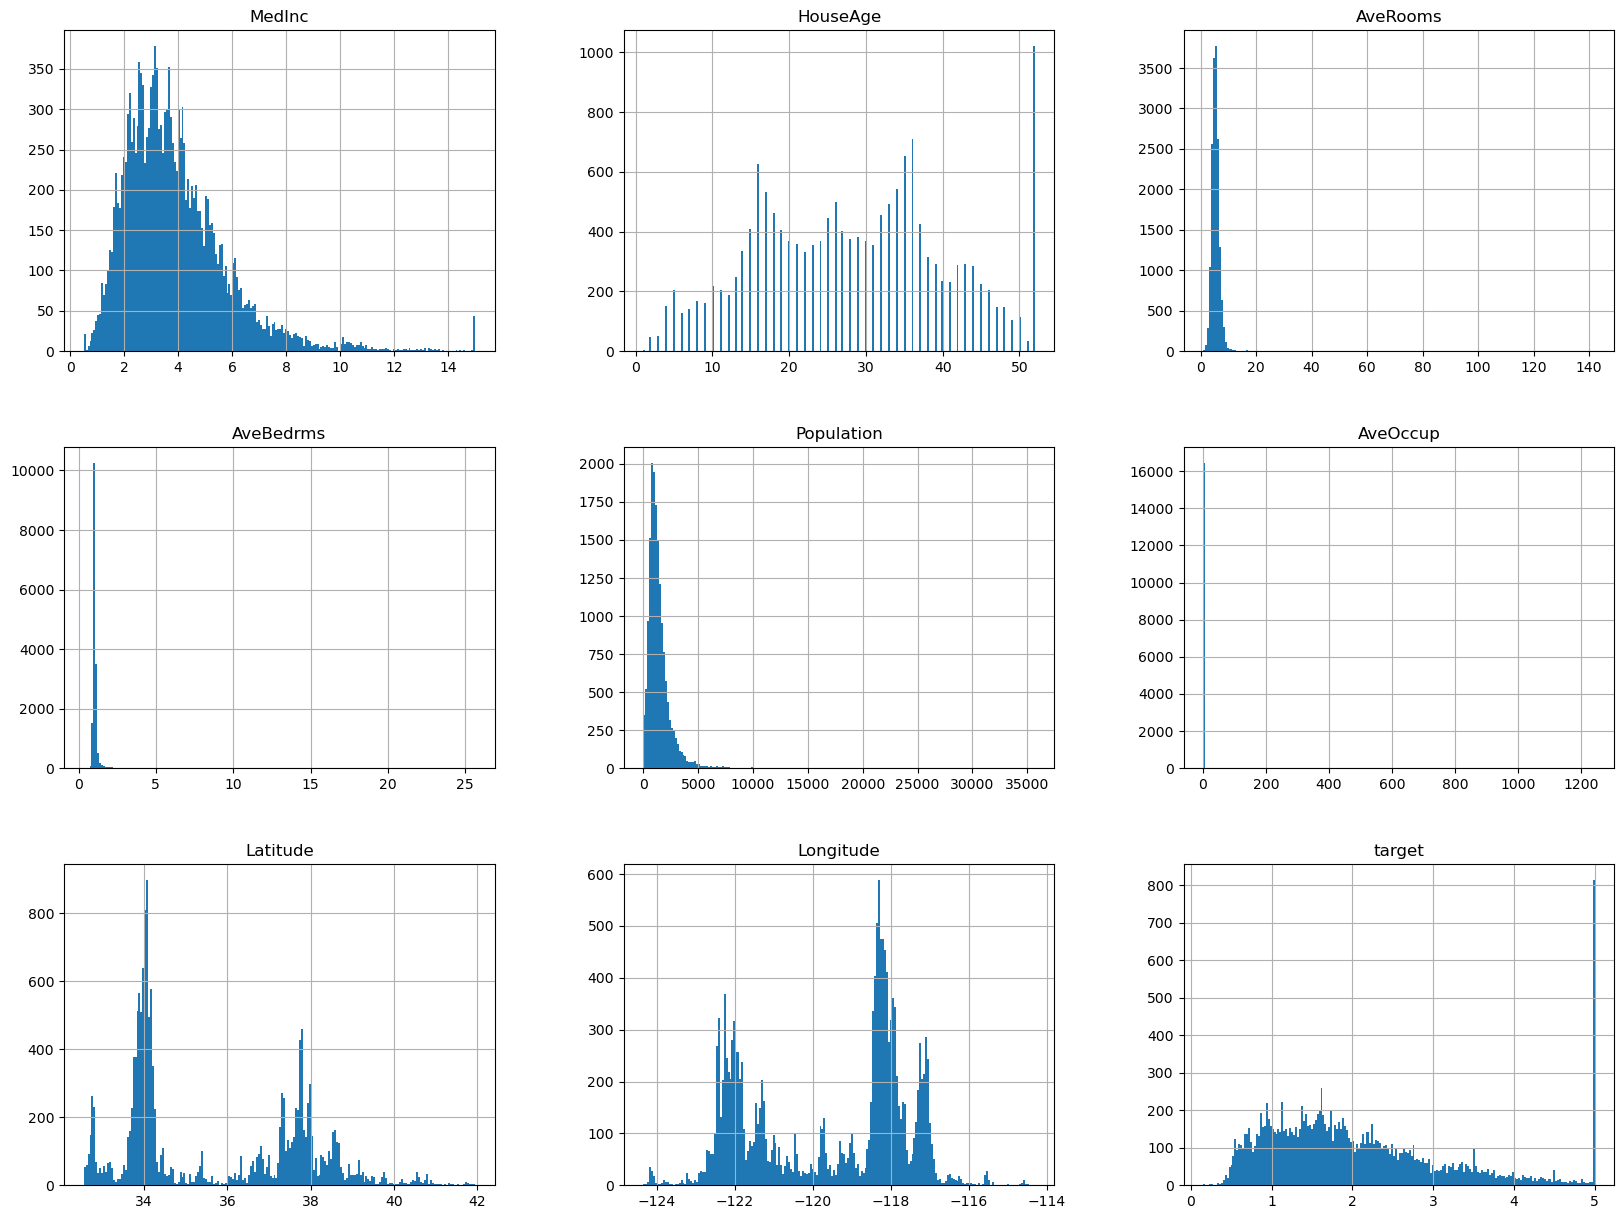

In [14]:
import matplotlib.pyplot as plt
df.hist(bins=200,figsize=(20,15))
plt.show()

<Axes: >

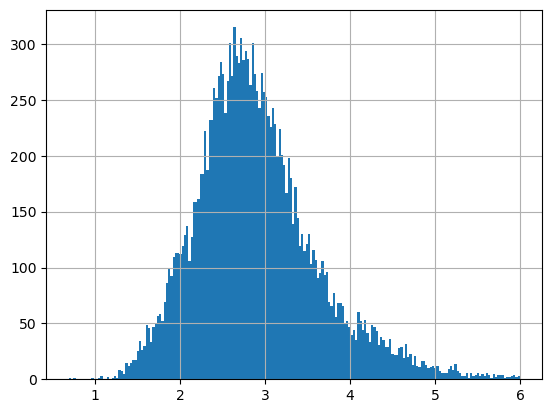

In [15]:
df[df['AveOccup'] < 6]['AveOccup'].hist(bins=200)

<Axes: >

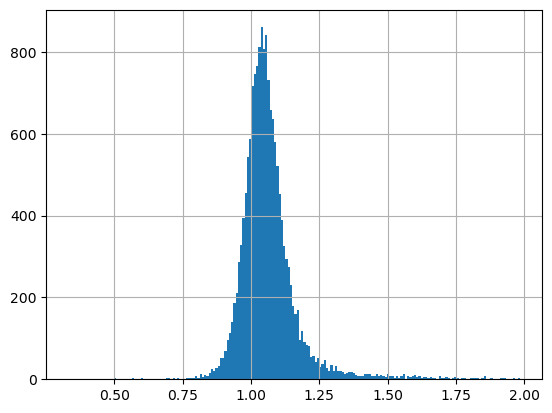

In [16]:
df[df['AveBedrms'] < 2]['AveBedrms'].hist(bins=200)

<Axes: >

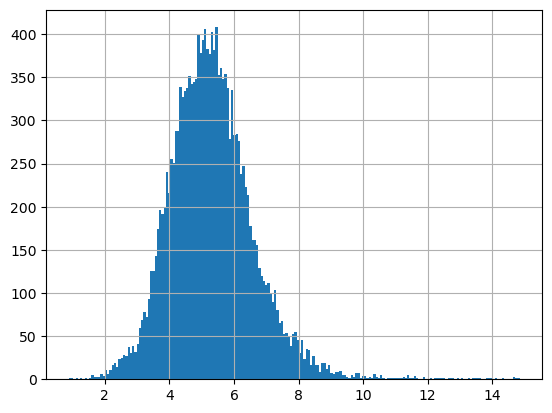

In [17]:
df[df['AveRooms'] < 15]['AveRooms'].hist(bins=200)

In [18]:
df = df[
    (df['AveOccup'] < 6) &
    (df['AveBedrms'] < 2) &
    (df['AveRooms'] < 15) &
    (df['MedInc'] < 14) &
    (df['HouseAge'] < 52) &
    (df['target'] < 5)
]

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

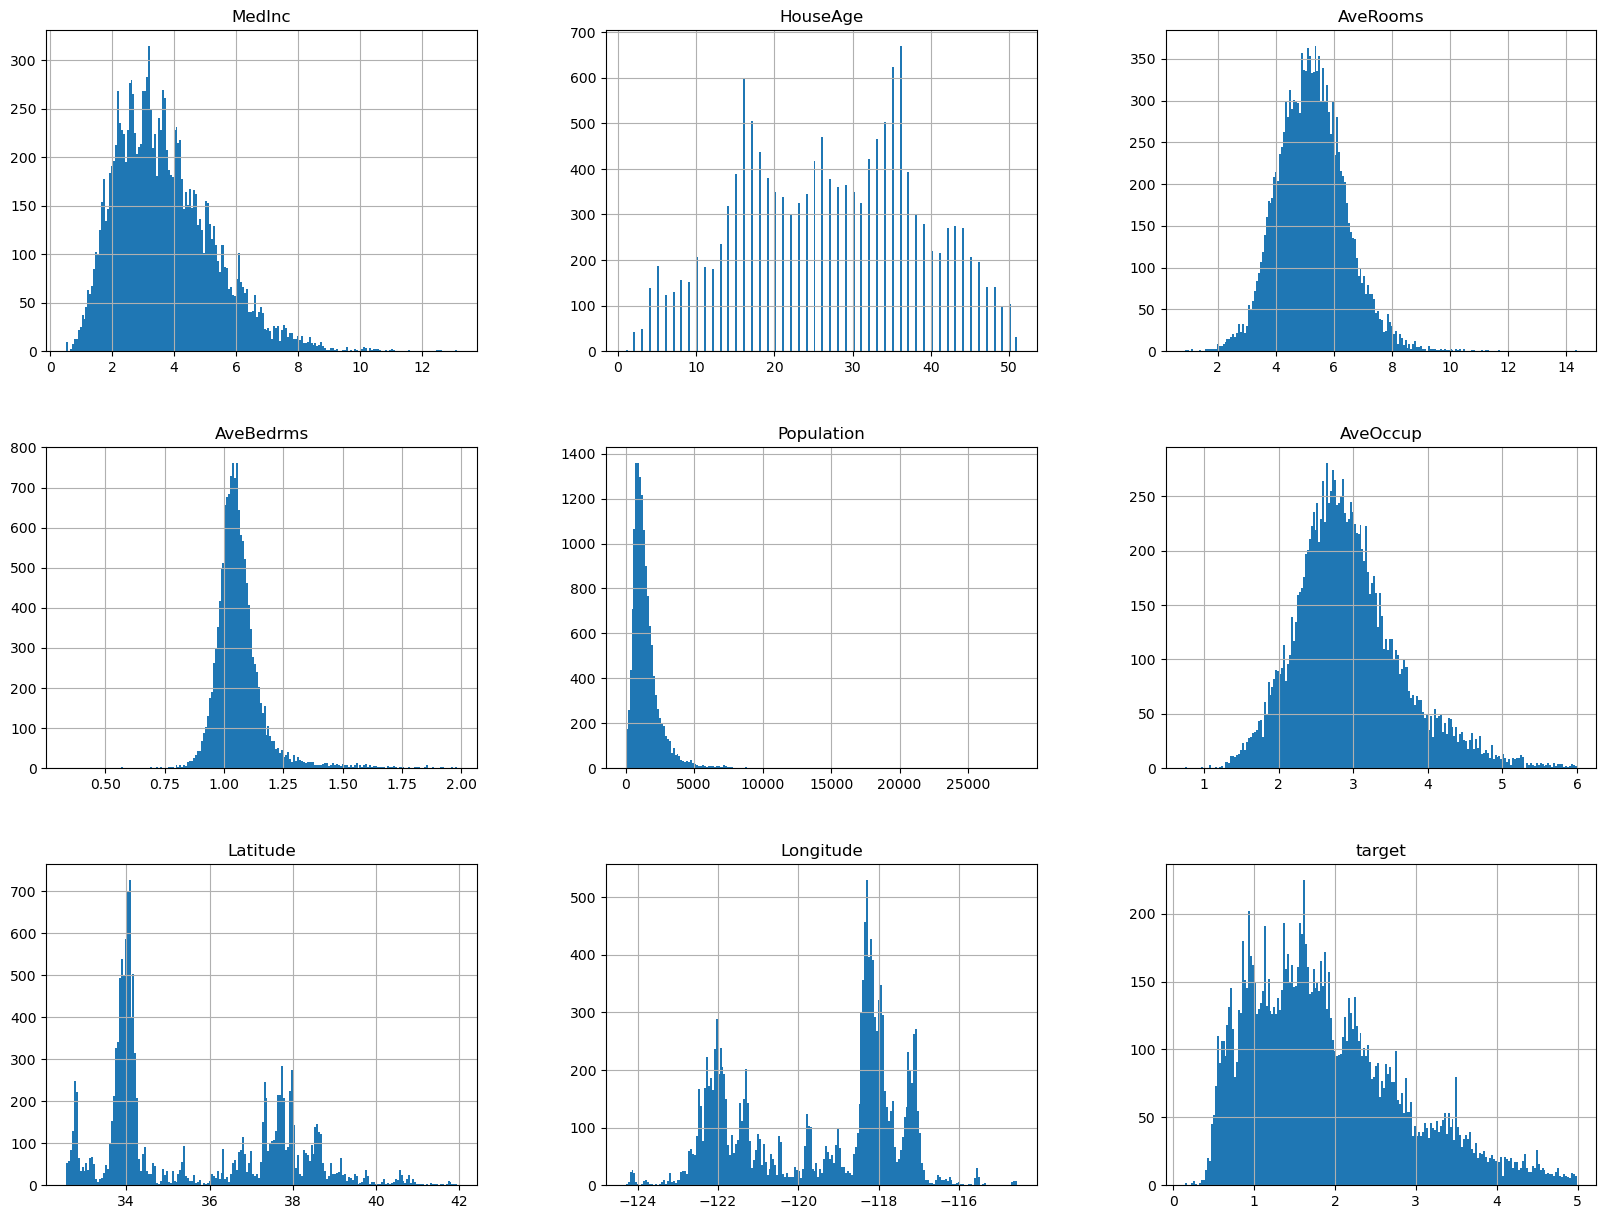

In [19]:
df.hist(bins=200, figsize=(20, 15))

In [20]:
import numpy as np

In [21]:
df['target'] = df['target'].apply(np.log10)
df['Population'] = df['Population'].apply(np.log10)

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

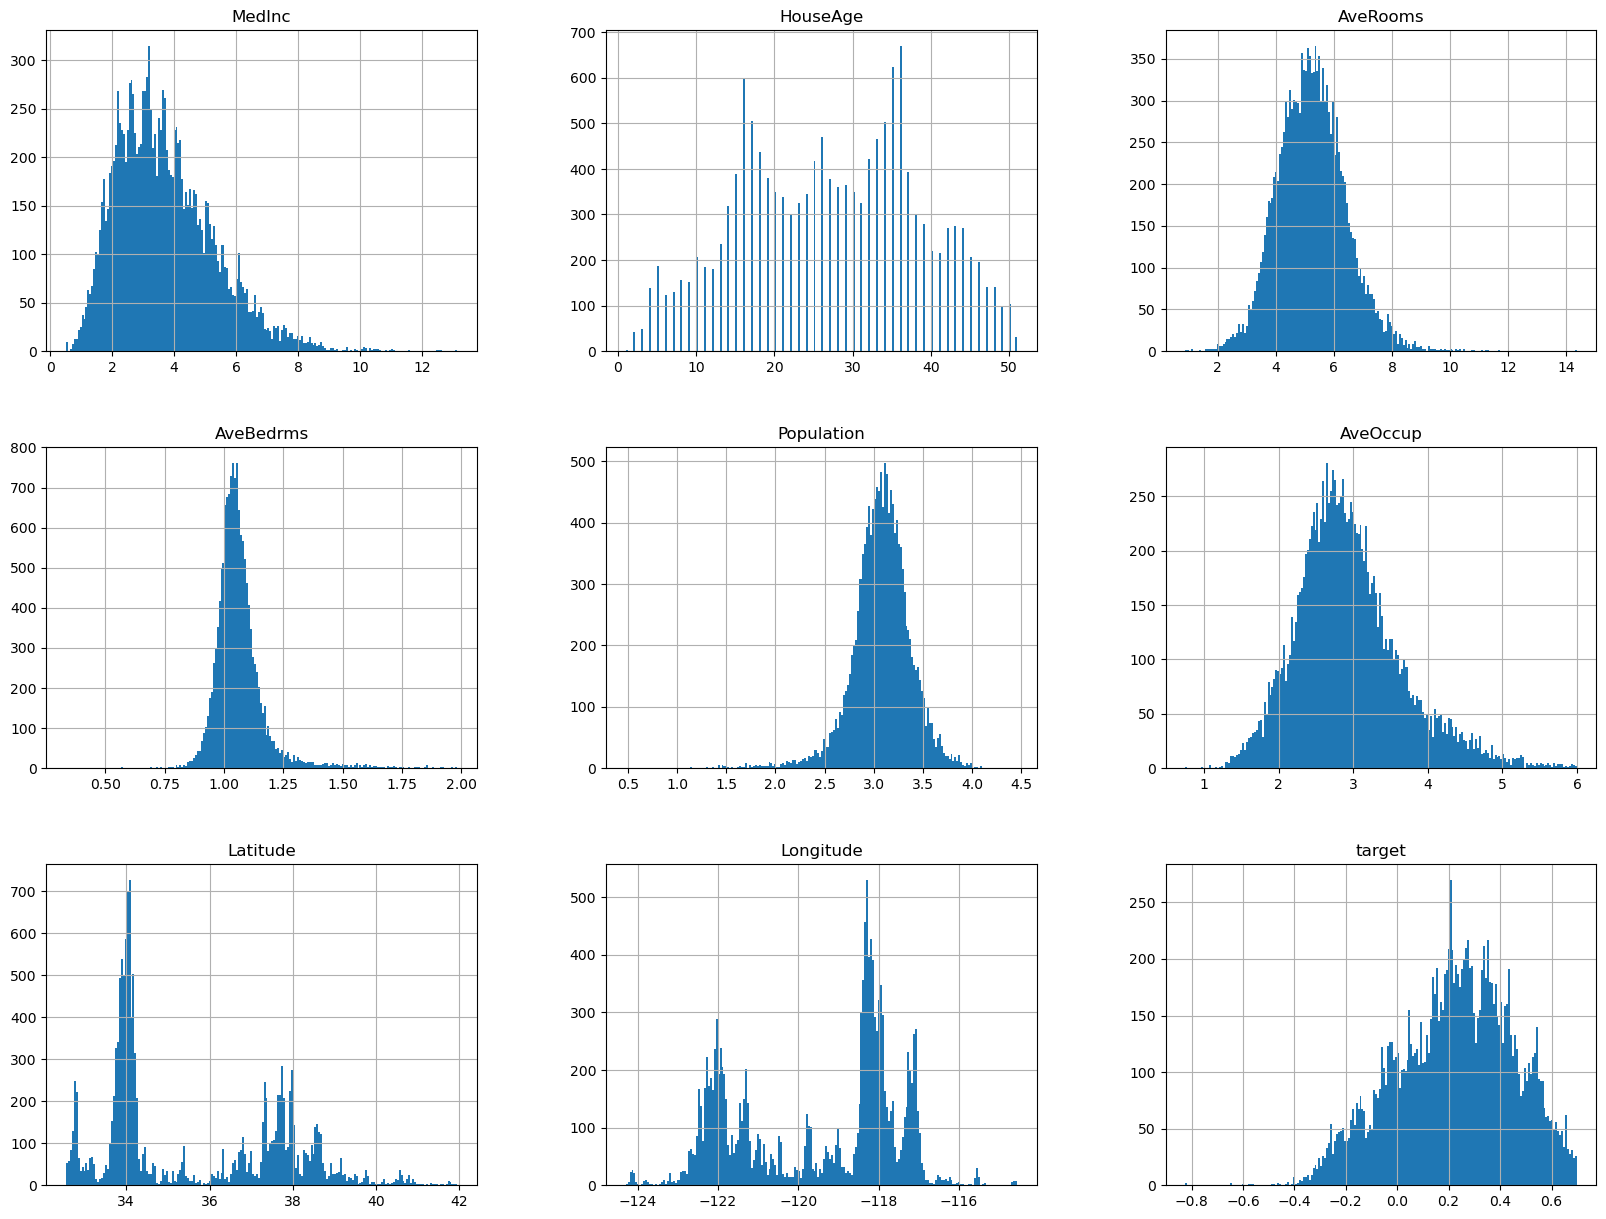

In [22]:
df.hist(bins=200, figsize=(20, 15))

In [23]:
def clean_data(X, y):
    df = pd.DataFrame(X, columns=data['feature_names'])
    df['target'] = y
    df = df[
        (df['AveOccup'] < 6) &
        (df['AveBedrms'] < 2) &
        (df['AveRooms'] < 15) &
        (df['MedInc'] < 14) &
        (df['HouseAge'] < 52) &
        (df['target'] < 5)
    ]
    df['target'] = df['target'].apply(np.log1p)
    df['Population'] = df['Population'].apply(np.log1p)

    X = df.drop('target', axis=1).copy().values
    y = df['target'].copy().values

    return X, y

X_train, y_train = clean_data(X_train, y_train)
X_test, y_test = clean_data(X_test, y_test)

## Model

In [24]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
)

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_val)

In [27]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(rmse)
print(100*(np.exp(rmse) - 1))

0.176279230012297
19.277106963561685


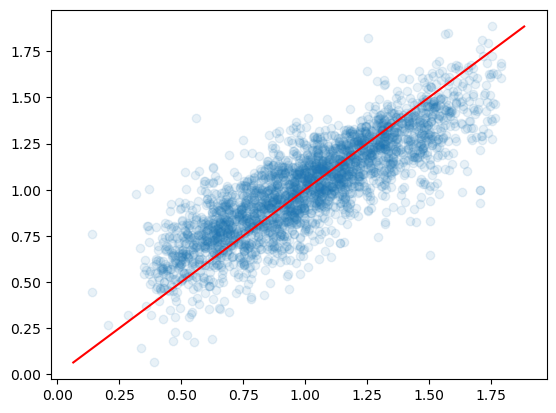

In [28]:
x_aux = np.linspace(y_pred.min(), y_pred.max(), 100)

plt.plot(x_aux, x_aux, color='red')
plt.scatter(y_val, y_pred, alpha=0.1)


## Polinomial

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
)

In [31]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
model1 = LinearRegression().fit(X_train_poly, y_train)

y_pred1 = model1.predict(X_test_poly)

In [33]:
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
print(rmse)
print(100*(np.exp(rmse) - 1))

0.17159761044626157
18.720002020054373


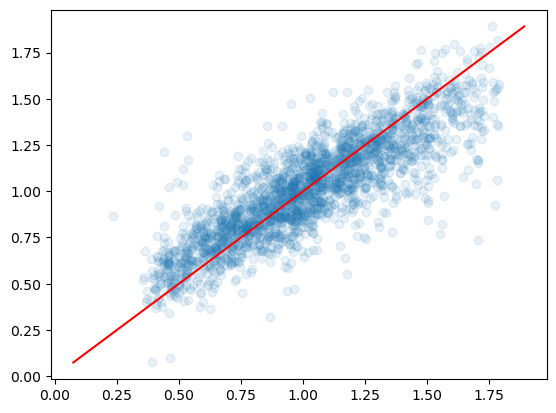

In [34]:
x_aux = np.linspace(y_pred1.min(), y_pred1.max(), 100)

plt.plot(x_aux, x_aux, color='red')
plt.scatter(y_test, y_pred1, alpha=0.1)

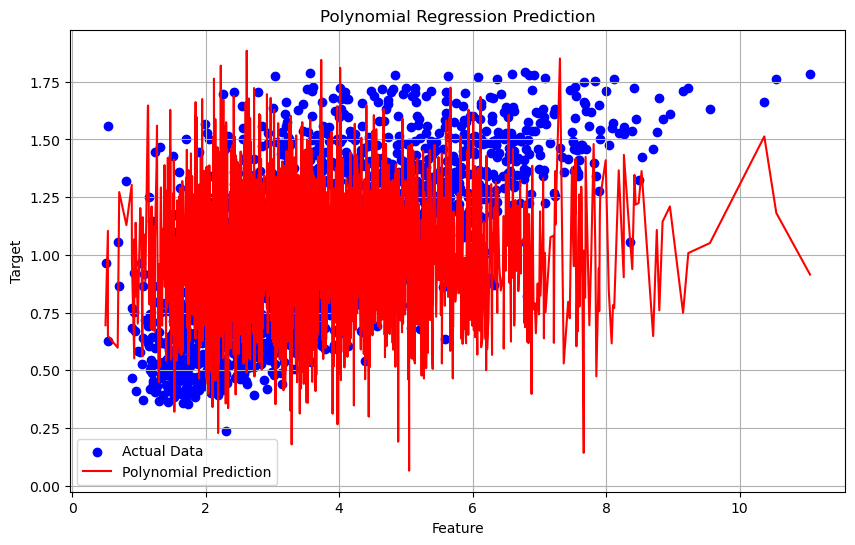

In [37]:
sorted_idx = np.argsort(X_test[:, 0])
X_test_sorted = X_test[sorted_idx, :]
y_test_sorted = y_test[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

# Plot the actual points and the polynomial regression line
plt.figure(figsize=(10, 6))

# Plot the true values
plt.scatter(X_test_sorted[:, 0], y_test_sorted, color='blue', label='Actual Data')

# Plot the polynomial predictions
plt.plot(X_test_sorted[:, 0], y_pred_sorted, color='red', label='Polynomial Prediction')

# Labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression Prediction')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

array([[   5.375     ,   16.        ,    4.76      , ...,    1.86      ,
          33.76      , -117.84      ],
       [   2.4063    ,   31.        ,    5.6       , ...,    2.86      ,
          37.73      , -120.91      ],
       [   2.0417    ,   17.        ,    5.2606383 , ...,    2.45921986,
          38.19      , -120.67      ],
       ...,
       [   4.4271    ,   44.        ,    5.51417004, ...,    2.87044534,
          33.88      , -118.36      ],
       [   7.9943    ,   16.        ,    8.36760925, ...,    2.96143959,
          34.2       , -118.9       ],
       [   3.1393    ,   14.        ,    6.31079478, ...,    2.30960854,
          33.97      , -116.95      ]])